- load in evaluation dataset
- sub-sample a large set of features
- calculate PCA and save out for loading in other places. 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from sklearn.decomposition import PCA
import pickle
%matplotlib inline

In [2]:
# load smaller user behavior dataset
user_profile = pd.read_pickle('../data_user_view_buy/user_profile_items_nonnull_features_20_mins_5_views_v2_sample1000.pkl')
user_sample = user_profile.user_id.unique()
print(len(user_profile))
print(len(user_sample))
user_profile.head()

40141
961


,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,view_seconds,index,spu_id,view_spu_count,drop
1226,3787002243,14994645517246498,10006541,334,221597279072104476,10005949,334,389705,4,98,87616.0,2.215973e+17,11,0
1227,3787002243,14994645517246498,10006541,334,29349802448457744,10004542,334,7342,1,10,73880.0,2.934980e+16,11,0
2261,132681117,6831894477217820,10001155,334,27661017974767638,10004048,334,32451,1,6,21676.0,2.766102e+16,63,0
2262,132681117,6831894477217820,10001155,334,288869796837830741,10000351,334,33318,2,30,6475.0,2.888698e+17,63,0
2263,132681117,6831894477217820,10001155,334,301817675098247170,10020640,334,428149,1,9,25612.0,3.018177e+17,63,0


In [4]:
# read nn features 
spu_fea = pd.read_pickle("../data_nn_features/spu_fea_sample1000.pkl")

# How similar are PCs on 2 sub-samples of data? 

In [7]:
# sub-sample possible items
np.random.seed(1000)
item_sample = np.random.choice(user_profile.view_spu.unique(),size=3000)

# get item X feature matrix #
X_item_feature = np.empty((len(item_sample),len(spu_fea.features.as_matrix()[0])))
for ii,item_spu in enumerate(item_sample):
    X_item_feature[ii,:]=spu_fea.loc[spu_fea.spu_id==item_spu,'features'].as_matrix()[0]
    
# calculate PC's 
pca1 = PCA()
pca1.fit(X_item_feature)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
# sub-sample possible items
np.random.seed(2000)
item_sample = np.random.choice(user_profile.view_spu.unique(),size=3000)

# get item X feature matrix #
X_item_feature = np.empty((len(item_sample),len(spu_fea.features.as_matrix()[0])))
for ii,item_spu in enumerate(item_sample):
    X_item_feature[ii,:]=spu_fea.loc[spu_fea.spu_id==item_spu,'features'].as_matrix()[0]
    
# calculate PC's 
pca2 = PCA()
pca2.fit(X_item_feature)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
for i in range(10):
    print(np.corrcoef(pca1.components_[i,:],pca2.components_[i,:])[0,1])


0.989596783159
0.976819415357
-0.611981301025
0.64546023461
-0.791966038508
-0.784539319488
-0.907286692406
0.460205498172
0.424413489535
0.683556540565


- After component 2, they are not that correlated which is surprising. 

# Calculate PCA on all view items

In [10]:
# get item X feature matrix for all 

item_sample = user_profile.view_spu.unique()

X_item_feature = np.empty((len(item_sample),len(spu_fea.features.as_matrix()[0])))
for ii,item_spu in enumerate(item_sample):
    X_item_feature[ii,:]=spu_fea.loc[spu_fea.spu_id==item_spu,'features'].as_matrix()[0]
    

In [11]:
X_item_feature.shape

(17797, 2048)

In [12]:
# calculate PC's
pca_all = PCA()
pca_all.fit(X_item_feature)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pickle.dump(pca_all,open( "../data_nn_features/pca_all_items_sample1000.pkl", "wb" ))

In [17]:
pca_all = pickle.load(open('../data_nn_features/pca_all_items_sample1000.pkl','rb'))

(0, 500)

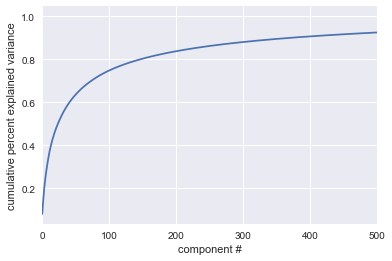

In [36]:
plt.plot(pca_all.explained_variance_ratio_.cumsum())
plt.ylabel('cumulative percent explained variance')
plt.xlabel('component #')
plt.xlim([0,500])


In [37]:
%%bash 
#jupyter nbconvert --to Plotting_Sequences_in_low_dimensions.ipynb && mv Plotting_Sequences_in_low_dimensions.slides.html ../notebook_slides/Plotting_Sequences_in_low_dimensions_v1.slides.html
jupyter nbconvert --to html Dimensionality_Reduction_on_Features.ipynb && mv Dimensionality_Reduction_on_Features.html ../notebook_htmls/Dimensionality_Reduction_on_Features_v1.html
cp Dimensionality_Reduction_on_Features.ipynb ../notebook_versions/Dimensionality_Reduction_on_Features_v1.ipynb

[NbConvertApp] Converting notebook Dimensionality_Reduction_on_Features.ipynb to html
[NbConvertApp] Writing 285891 bytes to Dimensionality_Reduction_on_Features.html
